In [7]:
%load_ext autoreload
from hashing_lib import *
import time
import pandas as pd
import matplotlib
import math
import random
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

# Task 1. Hashing task! 

### Testing a custom hash function
We used a custom hash function which is simplified version of murmur hash: 
- Each symbol (8 bit) of the original string moved to one of 4 blocks of 8 bits. Then, XOR applies for corresponding block. "The XOR function is 50% 0 and 50% 1, therefore it is good for combining uniform probability distributions." 
https://stackoverflow.com/questions/5889238/why-is-xor-the-default-way-to-combine-hashes
- Next, so called rotation of bits performed. After that, obtained number multiplied by a prime number. All operations are repeated with the last 32 bits.
- The last operations are shuffling of bits by multilying on 'magic' numbers (https://github.com/aappleby/smhasher/wiki/MurmurHash3) and applying XOR to the last bits.

A test of hash function performed on N random strings of size 20.

Time of 100000 iterations 9.151182889938354


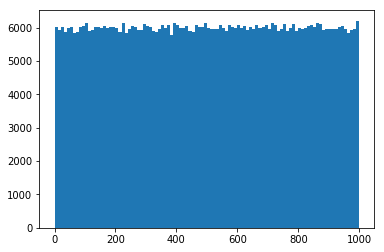

In [36]:
test_my_hash(100000)

The next test was perfomed on vocabulary of words from homework 3. As we can see, the distribution is not so good as for random data. 

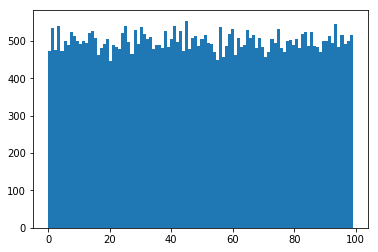

In [4]:
test_my_hash_2()

In [33]:
def BloomFilter(passwords1, passwords2):
    start = time.time()

    # add all passwords1 to the filter
    bloom_bits = add_passwords(passwords1)
    
    # check all passwords2 presence in the filter
    detected_duplicates = check_passwords(bloom_bits, passwords2)
    
    end = time.time()
    
    print('Number of hash function used: ', num_of_functons)
    print('Number of duplicates detected: ', detected_duplicates)
    print('Probability of false positives: ', tolerance)
    print('Execution time: ', end-start)
    
BloomFilter('passwords1.txt', 'passwords2.txt')

Number of hash function used:  6
Number of duplicates detected:  14469447
Probability of false positives:  0.01
Execution time:  18152.638706207275


##  Real duplicates
- Since files are large, it wasn't possible to load them into a memory and perform set intersaction. 
- For finding the real number of duplicates Binary Search was used. 
- The file 'passwords1.txt' was sorted by unix command 'sort' and outputed to 'sorted.txt'. 

In [25]:
real_duplicates()

The exact number of duplicates: 14000000


Here, we can see that error is greater then we expected (tolerance). The presumable reason is that the hash function doesn't produce a good unifrom distribution. Therefore, we can conclude, that simplified version is not good and we should have used original Murmurhash function.

In [39]:
print('Error: ', (14469447 - 14000000) / 14000000)

Error:  0.033531928571428574


# Task 2.  Alphabetical Sort

### 1. Counting Sort implementation

The next function **count_sort()** receives a list of INTEGERS, sorts this list according to counting sort algorithm, and returns a sorted list.<br/>

**NOTE:** Counting sort can be applied only for integers.<br/>

**Reference:** https://www.youtube.com/watch?v=7zuGmKfUt7s<br/>

In [2]:
def count_sort(lst):
    k=max(lst)
    counts= np.zeros(k+1,int) #O(k+1)
    sorted_lst= np.zeros(len(lst),int) #O(n)
    
    for i in lst: counts[i]+=1 #O(n)
        
    for i in range(k): counts[i+1]+=counts[i] #O(k)
        
    for i in lst:   #O(n)
        sorted_lst[counts[i]-1]=i
        counts[i]-=1
    return sorted_lst

In [3]:
print(count_sort([ 1, 4, 1, 2, 7, 5, 2, 7 ]))

[1 1 2 2 4 5 7 7]


**Complexity analysis**\
The initialization of the count array, and the second for loop which performs a prefix sum on the count array, each iterate at most k + 1 times and therefore take **O(k)** time. <br/>
The other two for loops, and the initialization of the output array, each take **O(n)** time.<br/>
Therefore, the time for the whole algorithm is the sum of the times for these steps, **O(n + k).**

### 2. Alphabets Sort 

As counting sort is only applied for integers, in order to sort alphabets using this kind of sort we have to:<br/>
**1-** Covert alphabets to integers. Using **char_position(letter)**<br/>
**2-** Sort the integers. Using **count_sort(lst)**<br/>
**3-** Convert integers back to alphabets. Using **pos_to_char(pos)**

In [4]:
alphabets=list(string.ascii_lowercase)

def char_position(letter):
    if letter=='':return -1
    return alphabets.index(letter)

def pos_to_char(pos):
    if(pos)==-1:return ''
    return alphabets[pos]

**NOTE** This method dosn't take into account upper case periority. If we need to take that into account, simply we have to create **alphabets** list as follow: ['A', 'a', 'B', 'b', 'C', 'c' ....] but n will be 52 instead of 26

In [5]:
char_position('x')

23

In [6]:
pos_to_char(23)

'x'

The following **sort_alphabets()** function takes a list of letters in any order and returns it ordered

In [7]:
def sort_alphabets(lst):
    lst_idx=[]
    for i in lst:
        lst_idx.append(char_position(i.lower()))
    out=count_sort(lst_idx)
    return [pos_to_char(i) for i in out]

In [8]:
all_alpha =['s','r','q','p','o','e','c','j','n','m','i','h','g',
            'z','w','v','b','l','u','t','f','d','k','a','y','x']
print('Sotred Alphabets: ',sort_alphabets(all_alpha))

Sotred Alphabets:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**Complexity analysis:**<br/>
<br/>
Assuming we have a list of 26 alphabets in order, elemnts are alphabets and indices are positions. To get position of target alphabet it takes **O(n)** at the worst case, but to get alphabet by position it takes only **O(1)**.<br/>
<br/>
Converting the input list of **alphabets into INTEGERS** will cost O(n).O(log(n)) = **O(nlog(n))** where n=26. if the input list is random then the cost could be **O(n^2)** in the worst case of ['z', 'z', 'z', 'z'] for example.<br/>
<br/>
As mentioned before, cost of counting sort is **O(n+k)** where **k** is the max value in input list.<br/>
<br/>
Converting the sorted **INTEGERS list back to alphabets** costs O(n).O(1) = **O(n)**<br/>
<br/>
the whole procces cost is: **O(nlog(n)) + O(n+k) + O(n)**, approximately = **O(nlog(n)) + O(3n)** as k = n = 26

### 3. Words Sort

List of words to be sorted:

In [9]:
words=['hi' , 'at', 'hello', 'this','those', 'there', 'from']

**words_mat()** functions takes the list of words and returns a matrix (m*n) of these words letters. m is number of words and n is the max word lenght in words.

In [10]:
def words_mat(words,n):
    mat=[]
    for i in words:
        mat.append([j for j in list(i)])
    for i in mat:
        while len(i)<n: i.append('')
    return mat

In [11]:
words_matrix= words_mat(words,5)

In [12]:
words_matrix

[['h', 'i', '', '', ''],
 ['a', 't', '', '', ''],
 ['h', 'e', 'l', 'l', 'o'],
 ['t', 'h', 'i', 's', ''],
 ['t', 'h', 'o', 's', 'e'],
 ['t', 'h', 'e', 'r', 'e'],
 ['f', 'r', 'o', 'm', '']]

In [13]:
def column(matrix, i): return [row[i] for row in matrix] #returns column by index

In [14]:
column(words_matrix,0)

['h', 'a', 'h', 't', 't', 't', 'f']

**Sort() function works as the following:**<br/>
1- sort all matrix with respect to the first column(index 0) **AND** keep the the rows which starting with same letter in one index as a list<br/>
<br/>
2- sort every index with length >1 with respect to the next column (index 1).<br/>
**if:** the values of the column are not equal, split the sorted rows to diffrent indeces<br/>
**else:** keep the block in one index and continue to the next columns<br/>
<br/>
3- when all indeces length equal to 1: stop

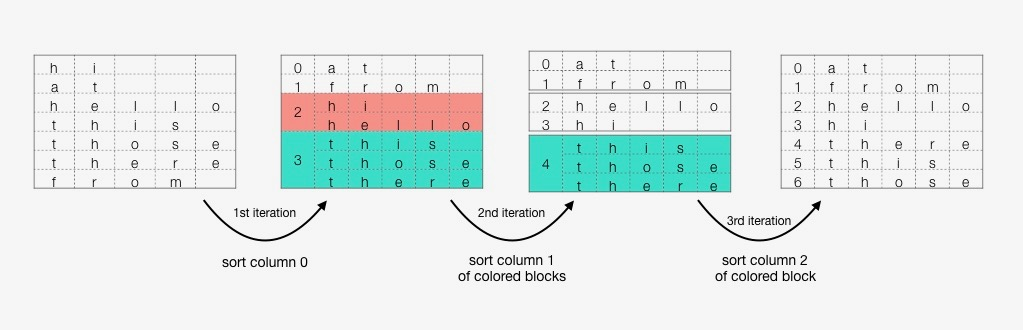

In [15]:
from IPython.display import Image
Image(filename =  "words_sort.jpg", width=1000, height=1000)

In [16]:
def sort(words_mat, m, n, p):
    #p arg is a pointer to the columns
    if p==0:
        col= column(words_mat, p) #get column
        sorted_col= sort_alphabets(col) #sort column
        sorted_mat=[]
        sorted_col_idx=[]
        for i in sorted_col: #get sorted column indices 
            sorted_col_idx.append(([j for j, e in enumerate(col) if e == i]))
        cleanidx = []
        [cleanidx.append(x) for x in sorted_col_idx if x not in cleanidx] #remove repeated indices

        for i in cleanidx: #append sorted rows to sorted_mat
            sub=[] 
            for j in i:
                sub.append(words_mat[j])
            sorted_mat.append(sub) 
        print('column: '+str(p)+' , matrix:',sorted_mat)
        return sort(sorted_mat, 9, 6, p+1) #call the function again geving sorted_mat(based on column 0) and point to column 1
    else:
        helper_mat= words_mat.copy() 
        sorted_col_idx2=[]
        sub_idx=[j for j in range(len(words_mat)) if len(words_mat[j])>1] #get indices of rows with length >1 (the colored rows in the image above)
        for sub in sub_idx: #sort every sub-matrix
            col2= column(words_mat[sub], p)
            if len(set(col2))==1: continue #if the current column contains the same letter(h&h&h from there,this and those)
            sorted_col2= sort_alphabets(col2)
            for k in sorted_col2: #get sorted columns indices
                sorted_col_idx2.append(([j for j, e in enumerate(col2) if e == k]))
            cleanidx2 = []
            [cleanidx2.append(x) for x in sorted_col_idx2 if x not in cleanidx2] #remove repeated indices
            sorted_sub=[]
            for i_ in cleanidx2: 
                sorted_sub.append(words_mat[sub][i_[0]])
            del helper_mat[sub]
            for i_2 in sorted_sub:
                helper_mat.insert(sub,[i_2])
                sub+=1
            print('column: '+str(p)+' , matrix:',helper_mat)
            return sort(helper_mat, m, n, p+1)
        return helper_mat

In [17]:
result=sort(words_matrix, 7, 5, 0)
print('Sorted words: ')
for i in result:
    print(''.join(i[0]))

column: 0 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'i', '', '', ''], ['h', 'e', 'l', 'l', 'o']], [['t', 'h', 'i', 's', ''], ['t', 'h', 'o', 's', 'e'], ['t', 'h', 'e', 'r', 'e']]]
column: 1 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'e', 'l', 'l', 'o']], [['h', 'i', '', '', '']], [['t', 'h', 'i', 's', ''], ['t', 'h', 'o', 's', 'e'], ['t', 'h', 'e', 'r', 'e']]]
column: 2 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'e', 'l', 'l', 'o']], [['h', 'i', '', '', '']], [['t', 'h', 'e', 'r', 'e']], [['t', 'h', 'i', 's', '']], [['t', 'h', 'o', 's', 'e']]]
Sorted words: 
at
from
hello
hi
there
this
those


**Complexity analysis:**

The complexity here is very high, to sort column it takes **O(nlog(n)) + O(3n)** like explained before. 
At the worst case here when sorting words, the complexity will goes to O(n).[O(nlog(n)) + O(3n)] = **O( n^2 . log(n) ) + O( 3 n^2 )**<br/>
Therefore, this counting sort algorithm is not convenient to this problem at all. it's designed to sort integer values that are in a fixed range, so it can't be applied to sort strings in efficient way.

# Task 3. Find similar wines!

In [8]:
from clustering_lib import *

We load the dataset and we normalize the parameters. Normalization ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences. 

In [10]:
wine=pd.read_csv('wine.data')

wine.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 
              'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
              'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']


df_unlabelled = wine.copy()

scaled_df_unlabelled = scale(df_unlabelled)

scaled_df_unlabelled_df = pd.DataFrame(scaled_df_unlabelled)
scaled_df_unlabelled_df.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
        'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
        'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']

standardized_wine=scaled_df_unlabelled_df
standardized_wine.head()

/Users/adm-vp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


,class_identifier,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


K-Means is implicitly based on pairwise Euclidean distances b/w data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. K-means is appropriate to use in combination with the Euclidean distance because the main objective of k-means is to minimize the sum of within-cluster variances, and the within-cluster variance is calculated in exactly the same way as the sum of Euclidean distances between all points in the cluster to the cluster centroid. As other answers point out, the algorithm is only guaranteed to converge (even if to a local minimum) if both the centroid update step and the data points reassignment step are done in the same n-dimensional Euclidean space. Also, the mean is the best estimator to be used when one needs to minimize total variance.

$$|\vec{d}|=\sqrt{(x{1}-x{0})^2 + (y{1}-y{0})^2}$$(1)


To calculate Euclidean distance with NumPy we can use numpy.linalg.norm:

In [5]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


## K-means algorithm is based on the following steps: 

### Step 1: Initialization
- To start we need to initialize the k-means. This is done by choosing the amplitude of the data set and k randomly arranged initial centroids. Choosing the number of centroids, you choose the clusters to which the data set will be composed and then the groupings you want to make and display.

### Step 2: Assignment of the cluster
- In this phase, the algorithm analyzes each of the data points and assigns them to the nearest centroid.Then the Euclidean distance is calculated between each data point and each centroid. Each data points will then be assigned to the centroid whose distance is minimal.

### Step 3: Updating the centroid position
- After step 2 it is likely that new clusters have been formed, as new data points will have been assigned (or removed depending on whether they have been transferred to another cluster). Consequently, the average position of the centroids is recalculated. The new value of a centroid will be the average of all the data points that have been assigned to the new cluster.


The algorithm ends here: or rather, we will continue to repeat steps 2 and 3 until the centroids change, ie we reach a point of convergence such that we no longer have changes to the clusters.It is said that the stop condition in this case has been reached. Usually it is represented by one of the following options:

1. no data points change cluster;

2. the sum of the distances is reduced to a minimum;

3. maximum number of iterations is reached.




In [11]:
k, centroids = kmeans_model(standardized_wine.values,3)
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)

Now we can visualize the composition of the three clusters:

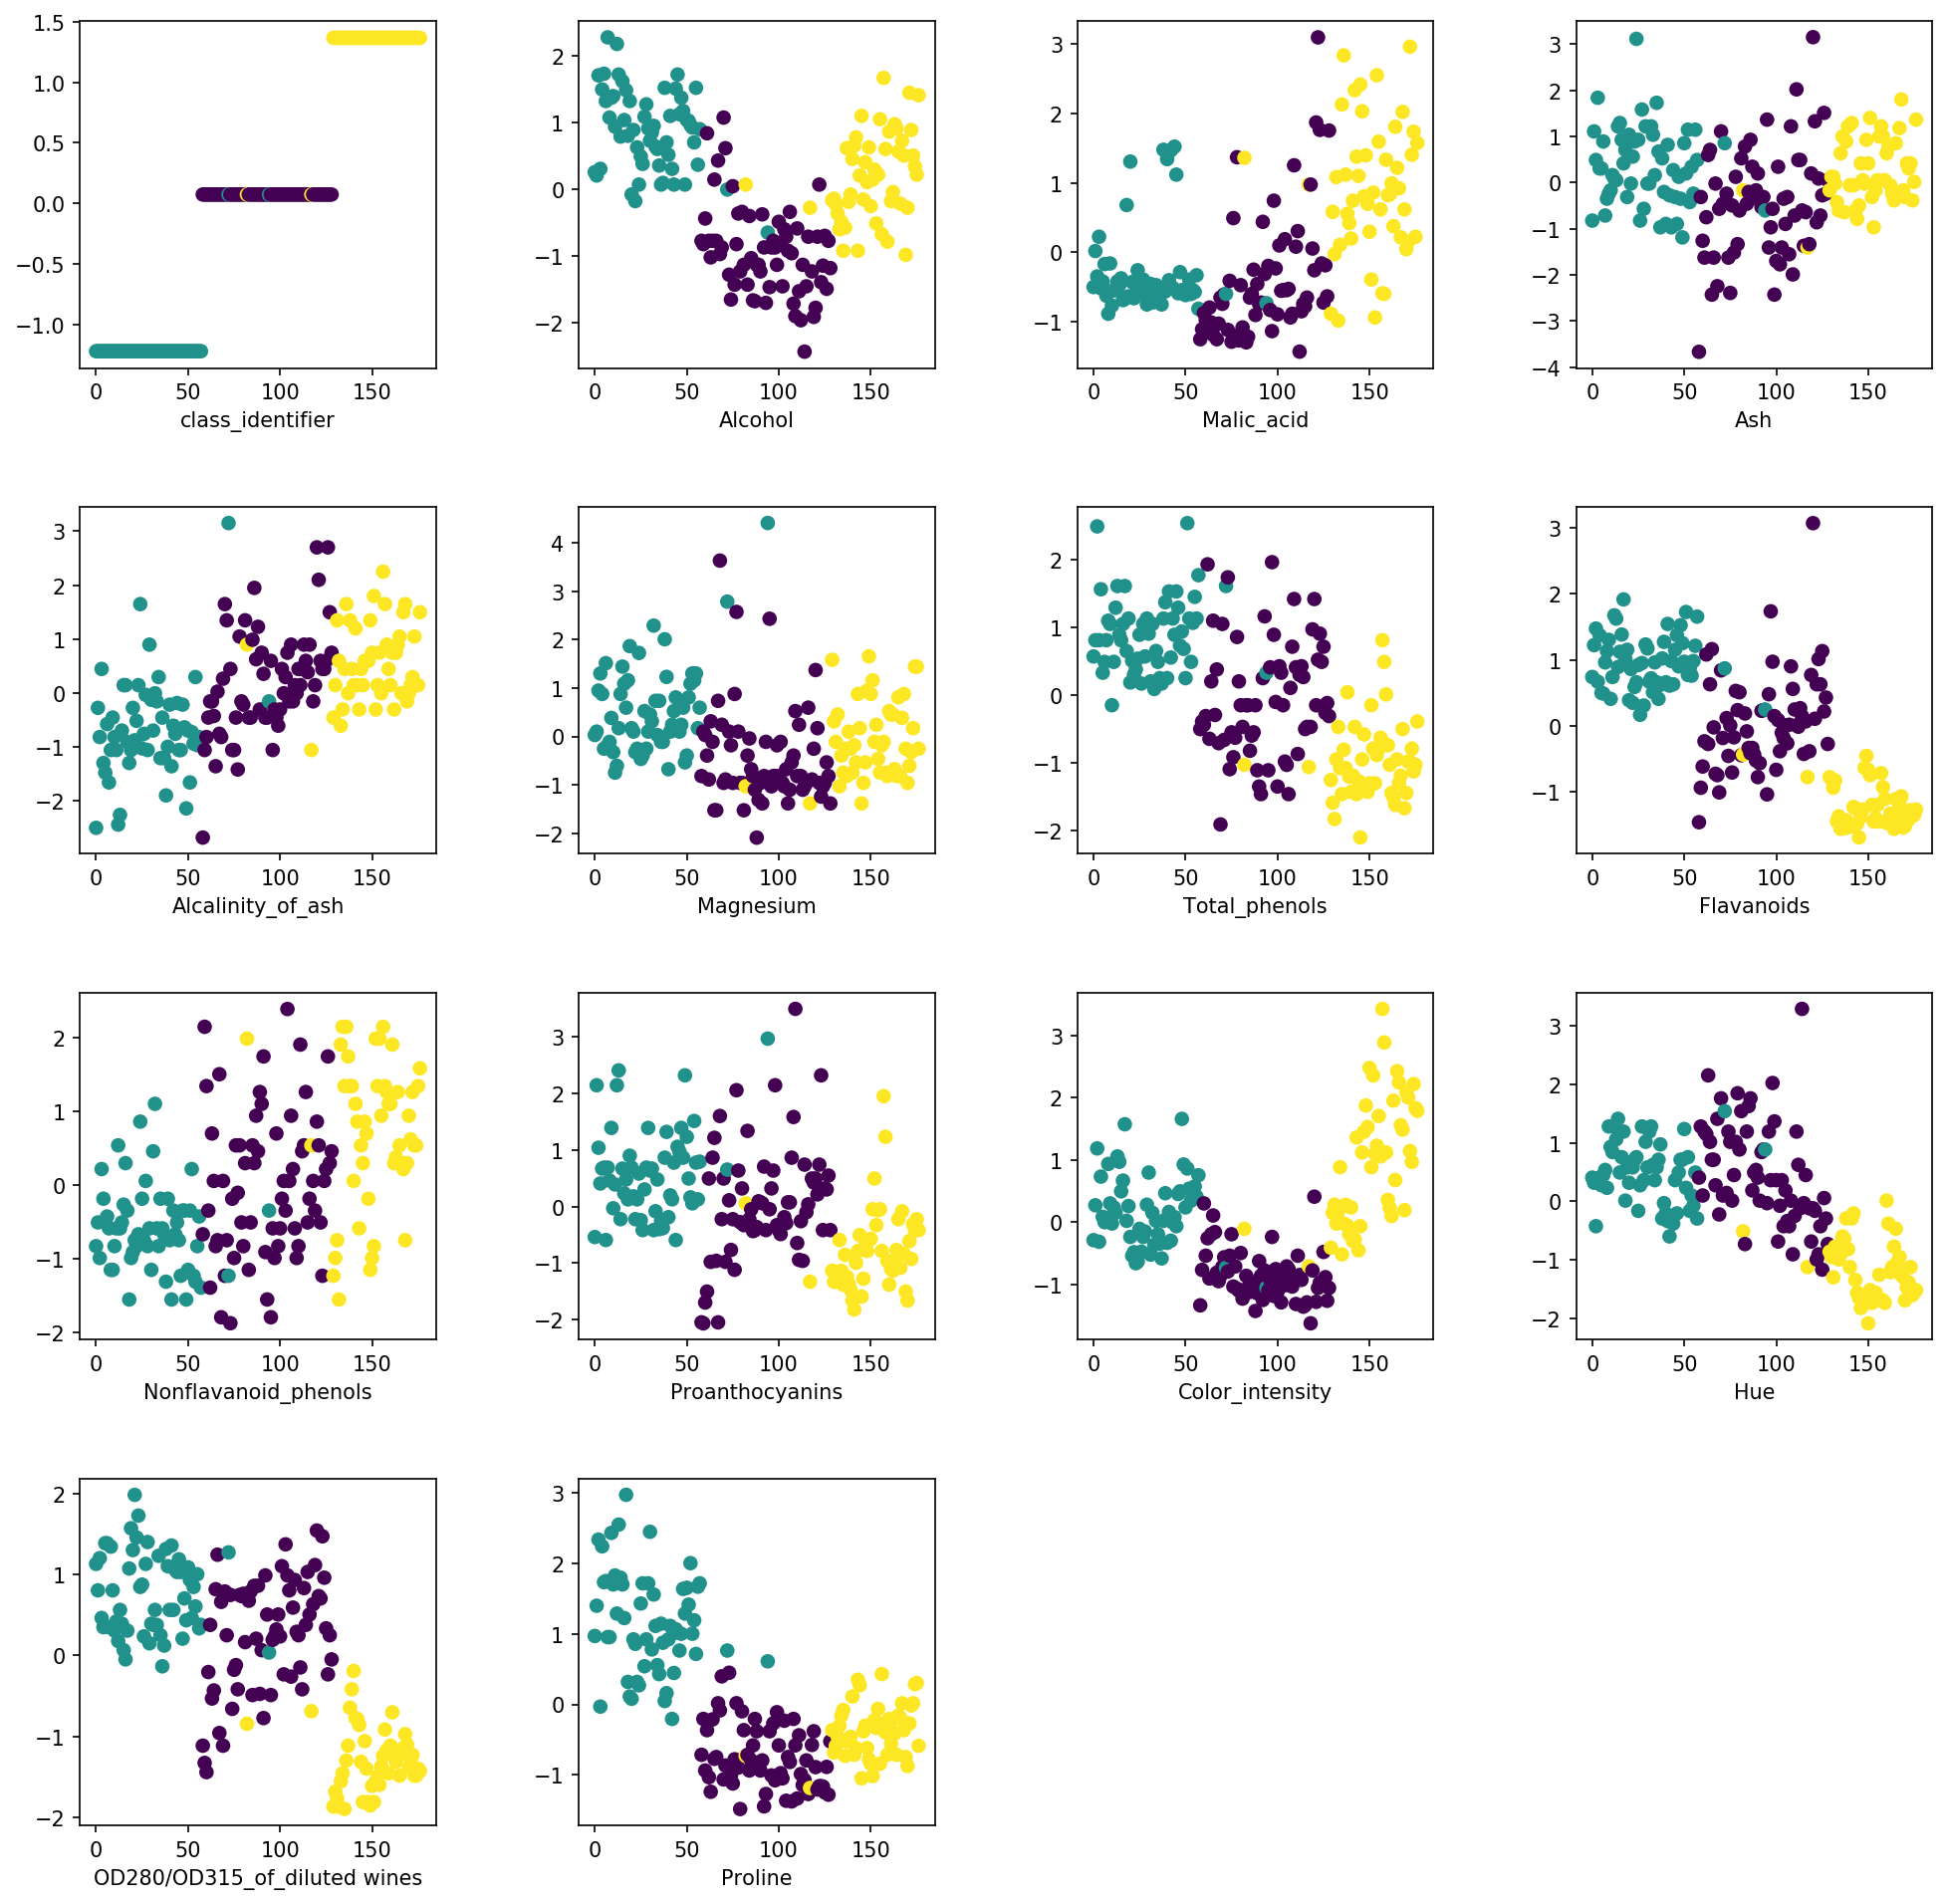

In [14]:
fig = plt.figure(figsize=(16, 16), dpi=150)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=1
for i in standardized_wine:
    ax = fig.add_subplot(4, 4, x)
    ax.scatter(range(len(standardized_wine)), standardized_wine[i], c=k)
    ax.set_xlabel(i)
    x+=1

#### Cluster 1:
Almost of the elements of the first cluster belong to the class type '1'. The instances 72,94,120 belong to the class type'2'. 
#### Cluster 2:
Almost of the elements of the first cluster belong to the class type '3'. The instances 82,129,130 belong to the class type'2'. 
#### Cluster 3: 
Almost of the elements of the first cluster belong to the class type '2'. The instances 58 and 59 belong to the class type'1'. 

We can observe that the clustering is based on the type of wine. So now we'll explore the different features to determine the most important features for the classification of the wines

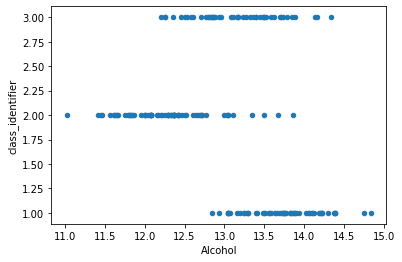

In [21]:
import matplotlib.pyplot as plt
wine.plot.scatter(x = 'Alcohol', y = 'class_identifier')

The lowest level of alcohol is for wines that belong to the class type 2, the most alcoholic wines are the type 1 wines, type 3 wines have a medium level of alcohol, even if this is a general overwiew, because there are some outliers

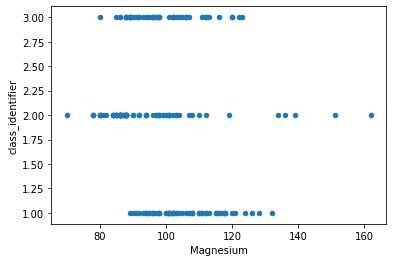

In [22]:
wine.plot.scatter(x = 'Magnesium', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

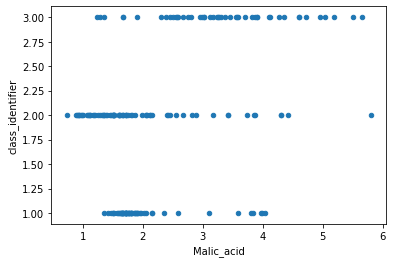

In [23]:
wine.plot.scatter(x = 'Malic_acid', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

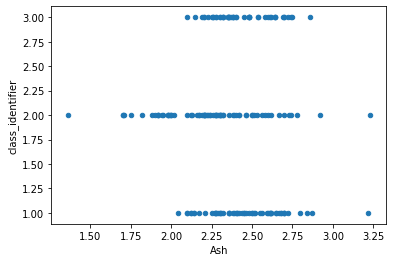

In [25]:
wine.plot.scatter(x = 'Ash', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

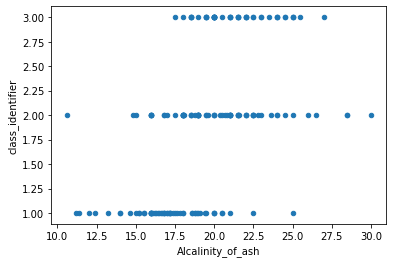

In [26]:
wine.plot.scatter(x = 'Alcalinity_of_ash', y = 'class_identifier')

The wines with the lowest level of Alcalinity of Ash are the wines that belong to the class type 1, for this variable too there are some outliers, especially for the class type 2

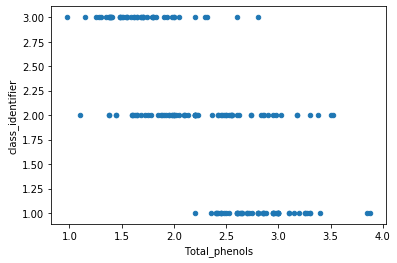

In [27]:
wine.plot.scatter(x = 'Total_phenols', y = 'class_identifier')

The the most part of type 3 wines has the lowest level of total phenols , the highest level is for the type 1 wines

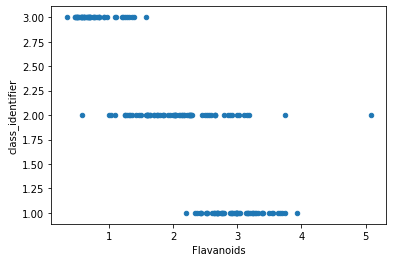

In [28]:
wine.plot.scatter(x = 'Flavanoids', y = 'class_identifier')

Class type 3 has the lowest level of flavanoids

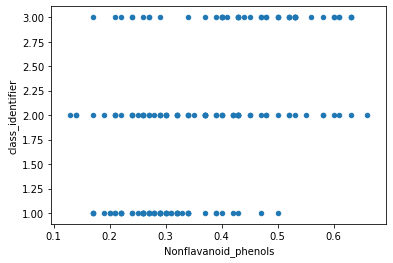

In [30]:
wine.plot.scatter(x = 'Nonflavanoid_phenols', y = 'class_identifier')

It's not a relevant feature

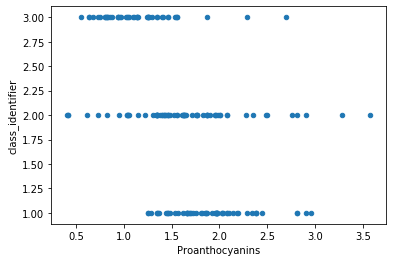

In [31]:
wine.plot.scatter(x = 'Proanthocyanins', y = 'class_identifier')

It's not a relevant feature

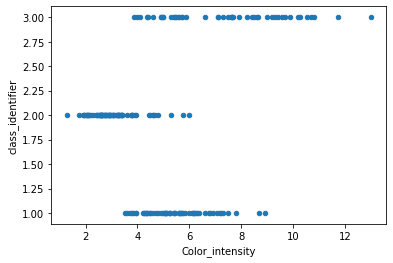

In [32]:
wine.plot.scatter(x = 'Color_intensity', y = 'class_identifier')

The wines that belong to second type are the wines that have the lowest level of color intensity, the wines that have the most intense colour are type 3 wines 

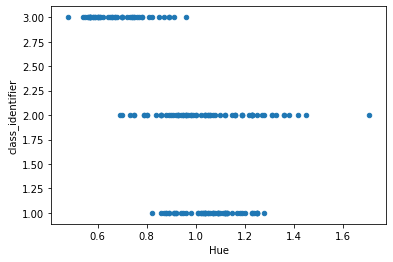

In [33]:
wine.plot.scatter(x = 'Hue', y = 'class_identifier')

Type 3 wines have the lowest level of Hue

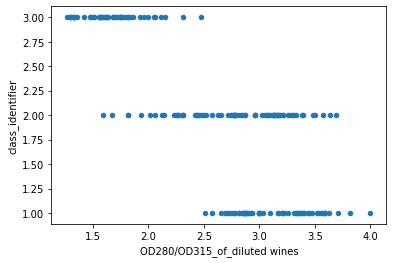

In [34]:
wine.plot.scatter(x = 'OD280/OD315_of_diluted wines', y = 'class_identifier')

Type 1 wines have the highest level of OD280/OD315_of_diluted wines, type 3 have the lowest

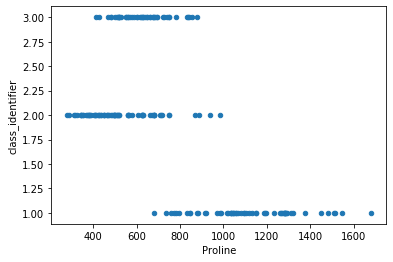

In [35]:
wine.plot.scatter(x = 'Proline', y = 'class_identifier')

Type 1 wines have the highest level of proline


### Final interpretation

observing the results of the clustering process, we realized how the classification took place based on the class to which it belonged. At this point, in order to give an overall assessment of the weight of each individual variable, we went to observe the influence of each of them with respect to the subdivision of the wines in these classes.

### Cluster 1
In this cluster there are the most alcoholic wines, with the highest level of proline and  OD280/OD315_of_diluted wines but with the lowest level of Alcalinity of Ash
### Cluster 2
In this cluster there are the less alcoholic wines, that has the lowest level of colour intensity 
### Cluster 3
In this cluster there are the  wines, with the lowest level of OD280/OD315_of_diluted wines and Hue, but this kind of wines has the highest level of colour intensity. They present a medium level of Alcohol. 

## Finding a number of clusters (Elbow method)

In [17]:
points_data = standardized_wine.values
def inertia(clusters, centroids):
    '''  Returns inertia of a model.
    '''
    return sum([((points_data[clusters[i]] - centroids[i]) ** 2).sum() for i in range(len(clusters))])

def cluster_points(clust, num):
    '''  Converting result of kmean_model to dictionary of list of point indecies.
    '''
    clusters={}
    for i in range(num):
        clusters[i]=np.where(clust == i)
    return clusters

/Users/adm-vp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


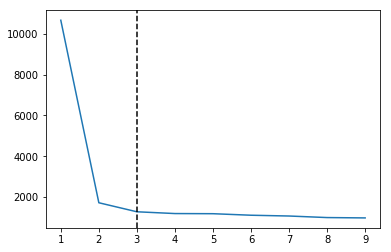

In [53]:
inerts = [] # List of inertias
for k in range(1, 10):
        #  Calculating clusters and centroids for each k
        clusters, centroids = kmeans_model(standardized_wine.values, k)
        
        #  Adding inertia to the list 
        inerts.append(inertia(cluster_points(clusters, k), centroids))
        
plt.plot(range(1,10), inerts)
plt.axvline(x=3, color="black", linestyle="--")

As we can see from the graph k=3 is good choice for a number of clusters, since after k=3 inertia starts decreasing linearly.

# (Bonus) MapReduce
https://stanford.edu/~rezab/classes/cme323/S16/projects_reports/bodoia.pdf

In [13]:
import threading, time
from collections import defaultdict

def kmeans_map(input_data):
    ''' Returns cluster index and point belonging to it
    '''
    point_index, K = input_data
    point = points_data[point_index]
    point_dist = []
    for cluster_index in range(K):
            distance_to_centroid = euclidean_distance(point, centroids[cluster_index])
            #  Appending tuples of form (distance, cluster_index) =>  [(1.23, 1), (2.23, 1), (0.43, 2) ....]
            point_dist.append( (distance_to_centroid, cluster_index) )

    #  Get cluster id by finding minimum distance
    min_value, to_cluster = min(*point_dist)
    return to_cluster, point_index

In [14]:
def kmeans_reduce(cluster_index, points):
    ''' Returns cluster index and new coordinates of the centroid
    '''
    points = points_data[points]
    return cluster_index, np.mean(points, axis=0)

In [18]:
def shuffle(data):
    res = defaultdict(list)
    for d in data:
        res[d[0]].append(d[1])
    
    return list(res.items())
        
def run_threads(func, num_of_threads, arguments):
    threads = []
    for i in range(len(arguments)):
        if not i % num_of_threads:
            if threads:
                #  Starting threads
                for t in threads:
                    t.start()
                
                #  Joining threads. Wait until all threads are executed
                for t in threads:
                    t.join()
            threads = []
        func_arg = arguments[i]
        threads.append(threading.Thread(target=func, args=(func_arg,)))
    
    if threads:
        for t in threads:
            t.start()
        for t in threads:
            t.join()

        
def map_wrap(input_data):
    map_return.append(kmeans_map(input_data))
    
def reduce_wrap(input_data):
    key, values = input_data
    reduce_return.append(kmeans_reduce(key, values))

In [20]:
num_of_threads = 10
num_of_points = len(points_data)
K = 3
points_data = standardized_wine.values

centroids = {}
new_centroids = {}
rand_indexes = random.sample(range(num_of_points), K)
for i in range(K):
    centroids[i] = points_data[rand_indexes[i]]

point_args = [(i, K) for i in range(num_of_points)]
j = 0
while True:
    j +=1
    print('Iteration:', j)
    map_return = []
    reduce_return = []
    #  Execute 'map' in threads
    run_threads(map_wrap, num_of_threads, point_args)
    
    #  Shufle data and execute 'reduce' in threads
    run_threads(reduce_wrap, K, shuffle(map_return))
    
    new_centroids = centroids
    centroids = dict(reduce_return)
    
    #  Check if centroids are equal
    compare = [] 
    for cent in [centroids, new_centroids]:
        compare.append(list(cent[p] for p in range(K)))
    
    if np.array_equal(compare[0], compare[1]):
        break
        
print('Clusters: ', shuffle(map_return))
print('Centroids: ', centroids)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Clusters:  [(0, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 72, 94]), (1, [58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]), (2, [82, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176])]
Centroids:  {0: array([-1.17927868,  0.87928462, -0.3028753 ,  0.32084486, -0.66341812,
        0.55745999,  0.88135057,  0.94817179, -0.587

# Task 4. K-means can go wrong!

The k-means algorthim, for clustering problems, aims at find the minimun of the function:

$$(V,C)=\sum\limits_{i=1}^{k} \sum\limits_{X_{j}\in P}||X_{j}-C_{i}||^2$$

where C wich is from 1 to K are all the centroids of the clusters we create, and X the vector of the variables for each unit in our problem.
This kind of algorithm doesn't ensure an optimal soluition for everytime it's used, the problem is given by the initialization that can bring to non optimal result, in fact there differents tipology of initiazilization that can bring safer results, but since the
algorithm is relative fast. we can just repeat the algorithm different times and find the minimun error.

For our task, we will use the same code and data from Question3, so we copy the algorithm we build with some difference:
Import the libraries

In [ ]:
import pandas as pd
import matplotlib
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import copy



Import the data but in this case we exclude the class_identifier

In [265]:
wine=pd.read_csv('wine.data')

wine.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 
              'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
              'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']


df_unlabelled = wine.copy()

scaled_df_unlabelled = scale(df_unlabelled)

scaled_df_unlabelled_df = pd.DataFrame(scaled_df_unlabelled)
scaled_df_unlabelled_df.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
        'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
        'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']

standardized_wine=scaled_df_unlabelled_df
standardized_wine=standardized_wine.drop(columns="class_identifier")
standardized_wine.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


The algorithm is the same, but we add the possibility to give an array to give a non random initilization to our algorithm

In [149]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)
def get_rand_centroids(min_lst,max_lst,n):
    centroids=np.zeros((n,len(min_lst)))
    for i in range(n):
        for j in range(len(min_lst)):
            max_=max_lst[j]
            min_=min_lst[j]
            rand=random.uniform(min_,max_)
            #print(i,j)
            centroids[i][j]=rand
    return centroids
def get_clusters(centroids, data, n):
    clusters= np.zeros(len(data))
    for i in range(len(data)):
        min_dis=10000
        for j in range(len(centroids)):
            distance = euclidean_distance(data[i], centroids[j])
            if distance < min_dis: 
                min_dis = distance
                clusters[i]= j
        min_dis=10000
    
    new_centroids = get_centroids(clusters, data, n)
    return clusters,new_centroids
def get_centroids(clusters, data, n):
    centroids=np.zeros((n,13))
    for i in range(n):
        cluster_points = np.where(clusters == i)
        centroids[i]= data[cluster_points].mean(0)
    return centroids
def kmeans_model(data,n,startcentroids):
    max_lst= np.array([data[:,i].max() for i in range(len(data[0])) ])
    min_lst= np.array([data[:,i].min() for i in range(len(data[0])) ])
    if type(startcentroids)==int:
        centroids= get_rand_centroids(min_lst,max_lst,n)
    else:
        centroids=startcentroids
    firstcentroids=centroids.copy()
    clusters= np.zeros(len(data))

    new_clusters, new_centroids= get_clusters(centroids, data, n)

    while not np.array_equal(new_clusters,clusters):
        clusters, centroids=new_clusters, new_centroids
        new_clusters, new_centroids= get_clusters(centroids, data, n)

    return clusters,firstcentroids

From the other task we found that some variable are more predictable so we take a look at the scatter plots first and after clustering, plus we add the position of the initialization

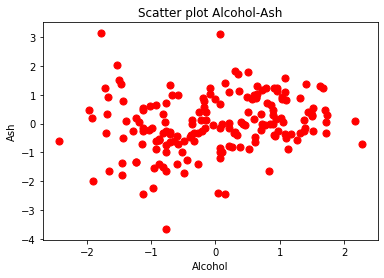

In [266]:
ax1 = plt.scatter(x='Alcohol', y='Ash', color="red" ,s=50, alpha=1, data=standardized_wine)
plt.title("Scatter plot Alcohol-Ash")
plt.xlabel("Alcohol")
plt.ylabel("Ash")
plt.show()

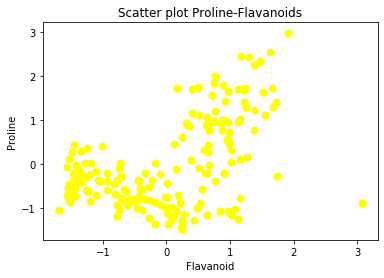

In [267]:
ax2 = plt.scatter(x='Flavanoids', y='Proline', color="yellow" ,s=50, alpha=1, data=standardized_wine)
plt.title("Scatter plot Proline-Flavanoids")
plt.xlabel("Flavanoid")
plt.ylabel("Proline")
plt.show()

### Apply the model

We apply the k-means clustering with a random imput of initial centroids, as we can see the RED CROSSes are the initial centroids, in this case pretty far from each other is these specific variables

C:\Users\nicolò\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


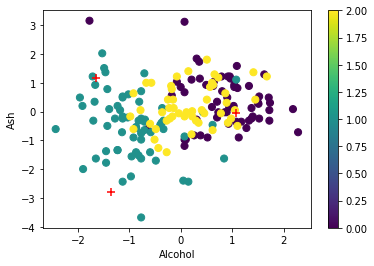

In [420]:
k=kmeans_model(standardized_wine.values,3,0)
p=k[1]
k=k[0]
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)

x = standardized_wine['Alcohol'].values
y = standardized_wine['Ash'].values

centers=np.zeros((3,2))
for i in range(len(centers)):
    for j in range(len(centers[i])):
        if j==0:
            centers[i][j]=p[i][0]
        else:
            centers[i][j]=p[i][2]
           
        
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=k,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Ash')
plt.colorbar(scatter)

fig.show()

C:\Users\nicolò\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


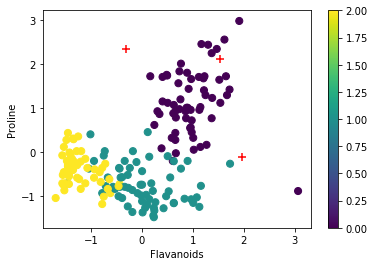

In [421]:
x = standardized_wine['Flavanoids'].values
y = standardized_wine['Proline'].values

centers=np.zeros((3,2))
for i in range(len(centers)):
    for j in range(len(centers[i])):
        if j==0:
            centers[i][j]=p[i][6]
        else:
            centers[i][j]=p[i][12]
           
        
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=k,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Proline')
plt.colorbar(scatter)

fig.show()


Now we calculate the minimun of the function, that the algorithm arrived to with this random initialization

In [422]:
for i in range(3):  
    clusters[i]=clusters[i][0]
centers=np.zeros((len(clusters),len(standardized_wine.iloc[clusters[0][0]])))
for i in range(len(clusters)):
    for k in range(len(standardized_wine.iloc[clusters[0][0]])):
        sum=0

        for j in range(len(clusters[i])):
            sum+=standardized_wine.iloc[clusters[i][j]][k]
        center=sum/len(clusters[i])
        centers[i][k]=center
distanze=copy.deepcopy(clusters)

for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            somm=np.linalg.norm(standardized_wine.iloc[clusters[i][j]]-centers[i])
            distanze[i][j]=somm
sumofdistances=0
for i in range(len(distanze)):
    for j in range(len(distanze[i])):
        sumofdistances+=distanze[i][j]
sumofdistances

352

358 is the result of this distance. even for most of the other initialization the minimum found is alwaya aroud 360-350.

Now we try to use a different initialization for the centroids, this is always coming from a randomization but it brings to different results...

C:\Users\nicolò\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


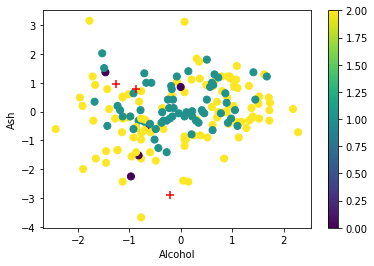

In [416]:
a=np.array( [[-0.87877259, 2.99948385,0.79823985,-0.9169008,3.55802317,-0.11870971 ,
               2.95108432,-1.19065815,3.42615219, 2.4518837,2.80259691, 0.04726285,
              -0.90181886],
             [-1.25939339,-0.63710647,0.96884859,2.92727428, 1.15686244, 0.58417166,
              -0.89427341, 2.06826668,1.95284375,1.36160809,-1.98816376,-0.99372938,
               2.72642284],
             [-0.21054614, 0.35972377,-2.89533882,-1.16807371, 1.79249099, 0.30964591,
               2.01156419, 1.42102208,-0.81550494, 2.71681973,-0.79943323,-0.15735984,
               0.25468268]])

k=kmeans_model(standardized_wine.values,3,a)
p=k[1]
k=k[0]
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)

x = standardized_wine['Alcohol'].values
y = standardized_wine['Ash'].values
centers=np.zeros((3,2))
for i in range(len(centers)):
    for j in range(len(centers[i])):
        if j==0:
            centers[i][j]=p[i][0]
        else:
            centers[i][j]=p[i][2]
           
           
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=k,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Ash')
plt.colorbar(scatter)

fig.show()


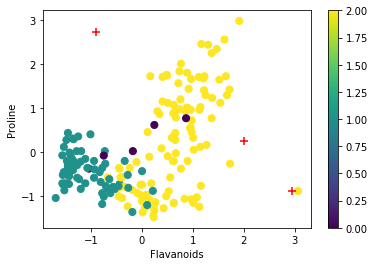

In [415]:
x = standardized_wine['Flavanoids'].values
y = standardized_wine['Proline'].values

centers=np.zeros((3,2))
for i in range(len(centers)):
    for j in range(len(centers[i])):
        if j==0:
            centers[i][j]=p[i][6]
        else:
            centers[i][j]=p[i][12]
           
        
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=k,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Proline')
plt.colorbar(scatter)

In this case as we can see the 2 clusters are way bigger then 1(violet), it's pretty clear visually that the clusterization didnt work really with this initialization,

In [413]:
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)
for i in range(3):  
    clusters[i]=clusters[i][0]

centers=np.zeros((len(clusters),len(standardized_wine.iloc[clusters[0][0]])))

for i in range(len(clusters)):
    for k in range(len(standardized_wine.iloc[clusters[0][0]])):
        sum=0

        for j in range(len(clusters[i])):
            sum+=standardized_wine.iloc[clusters[i][j]][k]
        center=sum/len(clusters[i])
        centers[i][k]=center
distanze=copy.deepcopy(clusters)

for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            somm=np.linalg.norm(standardized_wine.iloc[clusters[i][j]]-centers[i])
            distanze[i][j]=somm
sumofdistances=0
for i in range(len(distanze)):
    for j in range(len(distanze[i])):
        sumofdistances+=distanze[i][j]
sumofdistances

420

In [423]:
80/360

0.2222222222222222

The minimum found is 22% bigger than the one found with other initilization. considering that this algorithm in most of cases works around N (number of units) iteration. we can say that the cost of solution of this algorithm can be larger with the wrong initialization